# Kmeans for H&E images segmentation

We applied this algorithm on two images of PDAC dataset (B2 with and without background) in order to segment nuclei

As a reminder, we finally chose to do the segmentation with Visiopharm.

# 1. Import packages and data

conda env create -f env_cellpose.yml --name cellpose2

conda activate cellpose2

pip install ipykernel

python -m ipykernel install --user --name=cellpose2 --display-name=Cellpose2

pip install imagecodecs

pip install opencv-python

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Output files :

In [42]:
## Result folder 
output_files= f"/sbgenomics/output-files/data/segmentation_kmeans"
os.makedirs(output_files, exist_ok=True)

## workspace folder
output_workspace = f"./kmeans/segmented_images"
os.makedirs(output_workspace, exist_ok=True)

Import data :

In [59]:
image = cv2.imread("hne_normalized_wo_background/PDAC_B2_normalized_wo_background/PDAC_B2_result_normalized_wo_background.jpg")

In [75]:
image_name = "PDAC_B2_no_backrgound_normalized"
k = 2

In [4]:
image2 = cv2.imread("normalized_hne_images/PDAC_12747476B_A1_normalized.jpg")

In [43]:
image_name2 = "PDAC_B2_normalized"

# 2. Fonction definition

In [58]:
def kmeans_image (k, pixel_values, criteria):
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()
    
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image, labels, centers

# 3. Image preprocessing

In [61]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [62]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [63]:
print(pixel_values.shape)

(289228049, 3)


Stop either when some number of iterations is exceeded 100, or if the clusters move less than some epsilon value (0.2)

In [78]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.2)

# 4. Run kmeans

In [79]:
segmented_image, labels, centers = kmeans_image(k, pixel_values, criteria)

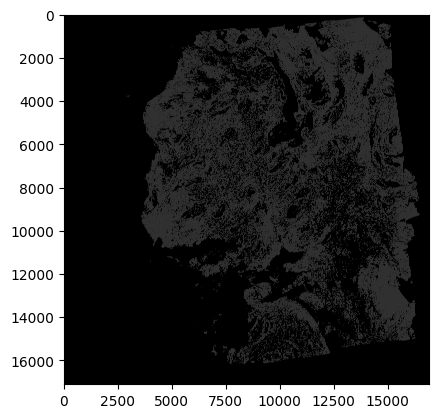

In [80]:
# show the image
plt.imshow(segmented_image)
plt.show()

# 5. Disable some clusters

In [81]:
centers

array([[48, 48, 48],
       [ 0,  0,  0]], dtype=uint8)

In [82]:
# disable only one cluster (turn the pixel into black)
masked_image1 = np.copy(image)
masked_image2 = np.copy(image)
#masked_image3 = np.copy(image)
#masked_image4 = np.copy(image)
#masked_image5 = np.copy(image)

In [83]:
# convert to the shape of a vector of pixel values
masked_image1 = masked_image1.reshape((-1, 3))
masked_image2 = masked_image2.reshape((-1, 3))
#masked_image3 = masked_image3.reshape((-1, 3))
#masked_image4 = masked_image4.reshape((-1, 3))
#masked_image5 = masked_image5.reshape((-1, 3))

In [84]:
# color (i.e cluster) to disable
cluster1 = 1
cluster2 = 2
#cluster3 = 3
#cluster4 = 4
#cluster5 = 5
masked_image1[labels == cluster1] = [255, 255, 255]
masked_image2[labels == cluster2] = [255, 255, 255]
#masked_image3[labels == cluster3] = [255, 255, 255]
#masked_image4[labels == cluster4] = [255, 255, 255]
#masked_image5[labels == cluster5] = [255, 255, 255]

In [85]:
# convert back to original shape
masked_image1 = masked_image1.reshape(image.shape)
masked_image2 = masked_image2.reshape(image.shape)
#masked_image3 = masked_image3.reshape(image.shape)
#masked_image4 = masked_image4.reshape(image.shape)
#masked_image5 = masked_image5.reshape(image.shape)

Text(0.5, 1.0, 'cluster 2')

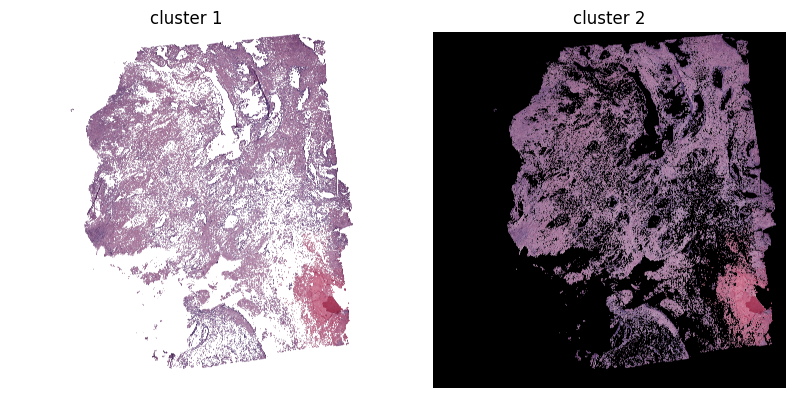

In [86]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(masked_image1)
plt.axis('off')
plt.title("cluster 1")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(masked_image2)
plt.axis('off')
plt.title("cluster 2")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 3)
  
# showing image
#plt.imshow(masked_image3)
#plt.axis('off')
#plt.title("cluster 3")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 4)
  
# showing image
#plt.imshow(masked_image4)
#plt.axis('off')
#plt.title("cluster 4")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 5)
  
# showing image
#plt.imshow(masked_image5)
#plt.axis('off')
#plt.title("cluster 5")


# 6. Save result

In [76]:
cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_segmented_{k}.jpg", segmented_image)
cv2.imwrite(f"{output_files}/{image_name}/{image_name}_segmented_{k}.jpg", segmented_image)

False

In [77]:
cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_masked_image1_{k}.jpg", masked_image1)
cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_masked_image2_{k}.jpg", masked_image2)
#cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_masked_image3_{k}.jpg", masked_image3)
#cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_masked_image4_{k}.jpg", masked_image4)
#cv2.imwrite(f"{output_workspace}/{image_name}/{image_name}_masked_image5_{k}.jpg", masked_image5)


True

# 7. Perform kmeans on images with background

In [44]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [45]:
# reshape the image2 to a 2D array of pixels and 3 color values (RGB)
pixel_values = image2.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [46]:
print(pixel_values.shape)

(293855406, 3)


Stop either when some number of iterations is exceeded 100, or if the clusters move less than some epsilon value (0.2)

In [20]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.2)

## Run kmeans :

In [48]:
segmented_image2, labels, centers = kmeans_image2(k, pixel_values, criteria)

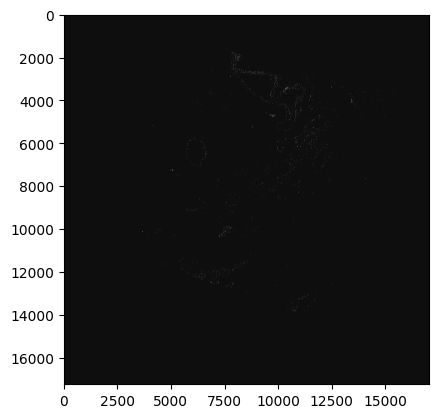

In [49]:
# show the image2
plt.imshow(segmented_image2)
plt.show()

## Disable some clusters :

In [50]:
centers

array([[ 14,  14,  14],
       [205, 220, 229]], dtype=uint8)

In [51]:
# disable only one cluster (turn the pixel into black)
masked_image21 = np.copy(image2)
masked_image22 = np.copy(image2)
#masked_image23 = np.copy(image2)
#masked_image24 = np.copy(image2)
#masked_image25 = np.copy(image2)

In [52]:
# convert to the shape of a vector of pixel values
masked_image21 = masked_image21.reshape((-1, 3))
masked_image22 = masked_image22.reshape((-1, 3))
#masked_image23 = masked_image23.reshape((-1, 3))
#masked_image24 = masked_image24.reshape((-1, 3))
#masked_image25 = masked_image25.reshape((-1, 3))

In [53]:
# color (i.e cluster) to disable
cluster1 = 1
cluster2 = 2
#cluster3 = 3
#cluster4 = 4
#cluster5 = 5
#masked_image21[labels == cluster1] = [255, 255, 255]
#masked_image22[labels == cluster2] = [255, 255, 255]
#masked_image23[labels == cluster3] = [255, 255, 255]
#masked_image24[labels == cluster4] = [255, 255, 255]
#masked_image25[labels == cluster5] = [255, 255, 255]

In [54]:
# convert back to original shape
masked_image21 = masked_image21.reshape(image2.shape)
masked_image22 = masked_image22.reshape(image2.shape)
#masked_image23 = masked_image23.reshape(image2.shape)
#masked_image24 = masked_image24.reshape(image2.shape)
#masked_image25 = masked_image25.reshape(image2.shape)

Text(0.5, 1.0, 'cluster 2')

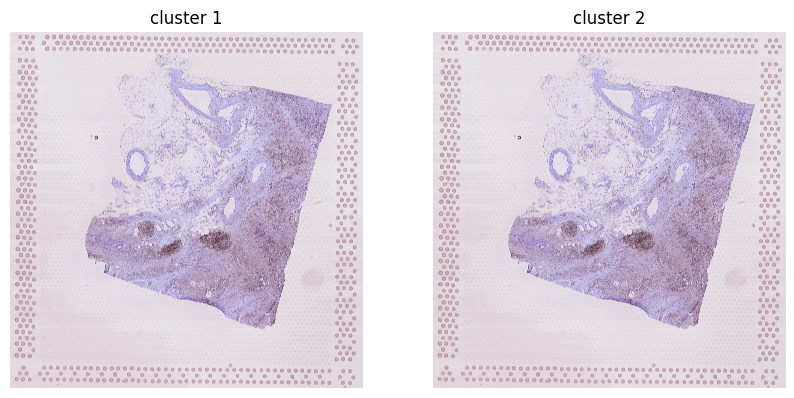

In [55]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image2
plt.imshow(masked_image21)
plt.axis('off')
plt.title("cluster 1")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image2
plt.imshow(masked_image22)
plt.axis('off')
plt.title("cluster 2")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 3)
  
# showing image2
#plt.imshow(masked_image23)
#plt.axis('off')
#plt.title("cluster 3")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 4)
  
# showing image2
#plt.imshow(masked_image24)
#plt.axis('off')
#plt.title("cluster 4")

# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 5)
  
# showing image2
#plt.imshow(masked_image25)
#plt.axis('off')
#plt.title("cluster 5")


## Save result :

In [40]:
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_segmented_5.jpg", segmented_image2)
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_masked_image21_5.jpg", masked_image21)
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_masked_image22_5.jpg", masked_image22)
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_masked_image23_5.jpg", masked_image23)
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_masked_image24_5.jpg", masked_image24)
cv2.imwrite("kmeans/segmented_image2s/PDAC_B2_normalized/PDAC_B2_normalized_masked_image25_5.jpg", masked_image25)


True

In [56]:
cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_segmented_{k}.jpg", segmented_image2)
cv2.imwrite(f"{output_files}/{image2_name}/{image2_name}_segmented_{k}.jpg", segmented_image2)

False

In [57]:
cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_segmented_{k}.jpg", segmented_image2)
cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_masked_image21_{k}.jpg", masked_image21)
cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_masked_image22_{k}.jpg", masked_image22)
#cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_masked_image23_{k}.jpg", masked_image23)
#cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_masked_image24_{k}.jpg", masked_image24)
#cv2.imwrite(f"{output_workspace}/{image2_name}/{image2_name}_masked_image25_{k}.jpg", masked_image25)


True